# Time Series

### Study of Bs As Tolls using:

* Linear Tendency and Rolling window
* Multi Step Prediction
* Prophet


---

### Importamos las librerias

In [3]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import seaborn as sns
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer   
from nltk.collocations import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud, STOPWORDS 
from bs4 import BeautifulSoup
from PIL import Image
from surprise import Dataset
from surprise import Reader
import requests
import gzip
import pandas as pd
import gc #garbage collector
import datetime
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
sns.set()
from fbprophet import Prophet
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import plot_plotly
import plotly.graph_objects as go
import plotly.offline as py
import plotly.graph_objs as go

---

### Cargamos los datasets

In [4]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [5]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [6]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [7]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [9]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [10]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


#### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

---

### Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [12]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [14]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [15]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

### Graficamos la cantidad de autos por hora

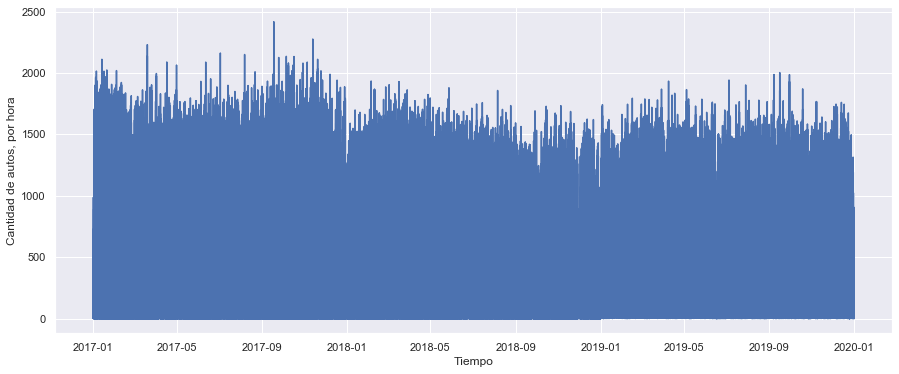

In [16]:

plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

---

In [17]:

diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

In [18]:
filter_diario = diario[(diario['cantidad_pasos']>=20000) & (diario['cantidad_pasos']<=70000)]
print(filter_diario.shape)
filter_diario.head()

(1087, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

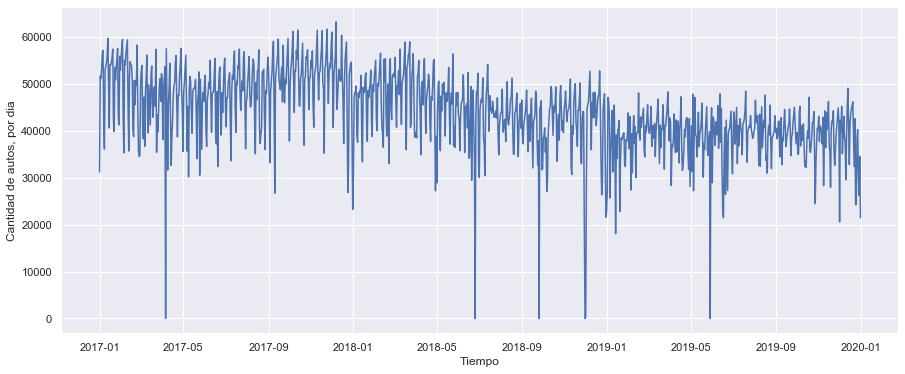

In [19]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

#### * Analizando los pasos diarios, podemos observar una tendencia a la baja pero sobre todo nos marca cinco días " outliers"  que nos        llaman la atención y pasamos a revisarlos en el siguiente punto:

### Outliers

Podemos obtener dos conjeturas 

* Deducimos que el 06/04, 25/06, 25/09 y el 29/05  fueron fechas de paro NACIONAL de los trabajdores y los validamos con este link:

06 - 04 - 2017
https://www.lanacion.com.ar/politica/paro-del-6-de-abril-la-huelga-se-hace-sentir-pero-la-ciudad-no-esta-paralizada-nid2005568/

25 - 06 - 2018
https://www.infobae.com/politica/2018/06/12/la-cgt-anuncio-un-paro-general-para-el-25-de-junio/

25 - 09 - 2018
https://www.infobae.com/politica/2018/08/29/la-cgt-anuncio-un-paro-general-para-el-25-de-septiembre/

29 - 05 - 2019
https://www.infobae.com/politica/2019/05/14/la-cgt-convoco-a-un-paro-general-de-24-horas-para-el-29-de-mayo/


* Por otro lado encontramos que el 30/11 fue feriado decretado por el estado por la conmemoracion del g20 en la ciudad de Buenos Aires

30 - 11 - 2018
https://www.infobae.com/politica/2018/10/30/el-gobierno-decreto-feriado-el-30-de-noviembre-en-la-ciudad-de-buenos-aires-por-la-cumbre-del-g20/



### Aqui localizamos cada unos de los outliers y sus respectivas fechas:

In [20]:
diario.loc[diario['cantidad_pasos'] == 0]

cantidad_pasos
fecha                     
2018-06-25               0
2018-09-25               0
2018-11-30               0
2019-05-29               0

In [21]:
diario.loc[(diario.cantidad_pasos>0)&(diario.cantidad_pasos<100)] 

cantidad_pasos
fecha                     
2017-04-06              40

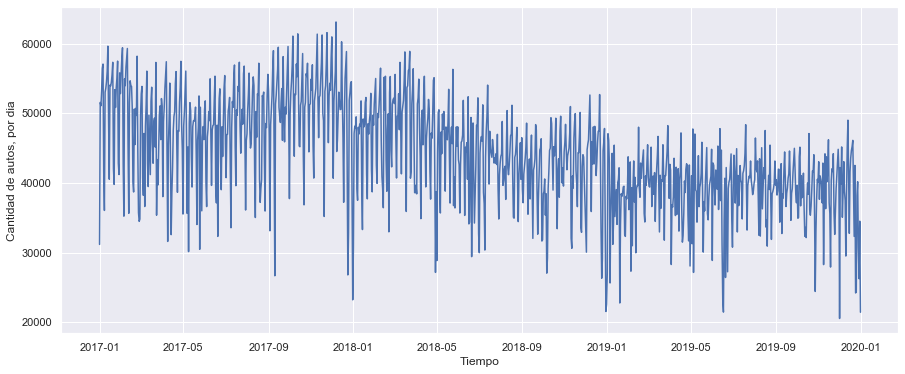

In [22]:
plt.figure(figsize = (15,6))
plt.plot(filter_diario.index, filter_diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [23]:
mensual = dataset.resample('M', on = 'fecha').mean()
mensual.head()

cantidad_pasos
fecha                     
2017-01-31      162.590631
2017-02-28      158.464659
2017-03-31      158.481380
2017-04-30      162.467187
2017-05-31      158.675688

In [24]:
mensual.tail()

cantidad_pasos
fecha                     
2019-08-31      413.370483
2019-09-30      417.482867
2019-10-31      397.450894
2019-11-30      413.314724
2019-12-31      394.939986

In [25]:
mensual['fecha']=mensual.index.map(datetime.datetime.toordinal)
mensual.head()

cantidad_pasos   fecha
fecha                             
2017-01-31      162.590631  736360
2017-02-28      158.464659  736388
2017-03-31      158.481380  736419
2017-04-30      162.467187  736449
2017-05-31      158.675688  736480

In [26]:
diario.isna()

cantidad_pasos
fecha                     
2017-01-01           False
2017-01-02           False
2017-01-03           False
2017-01-04           False
2017-01-05           False
...                    ...
2019-12-27           False
2019-12-28           False
2019-12-29           False
2019-12-30           False
2019-12-31           False

[1095 rows x 1 columns]

### Vamos a crear una ventana de tiempo para poder poder analizar la tendencia

In [27]:
ventana = int(365*2/7)
semanal_promedio_tendencia = filter_diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Name: cantidad_pasos, Length: 1087, dtype: float64

### Graficamos la cantidad de pasos mensual y la tendencia con Rolling Windows

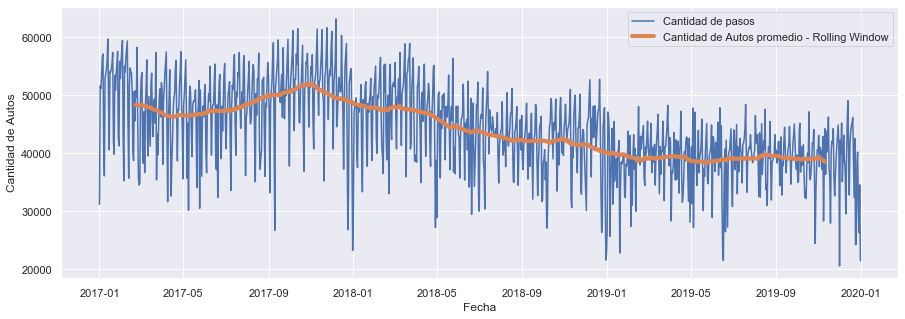

In [28]:
plt.figure(figsize = (15,5))
plt.plot(filter_diario.index, filter_diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Cantidad de Autos promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Autos')
plt.legend()
plt.show()

In [29]:
filter_diario['fecha']=filter_diario.index.map(datetime.datetime.toordinal)
filter_diario.head()

cantidad_pasos   fecha
fecha                             
2017-01-01           31183  736330
2017-01-02           51568  736331
2017-01-03           51093  736332
2017-01-04           53332  736333
2017-01-05           56486  736334

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(filter_diario.fecha.values.reshape(-1, 1), filter_diario.cantidad_pasos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Graficamos la cantidad de pasos mensual con un ajuste lineal

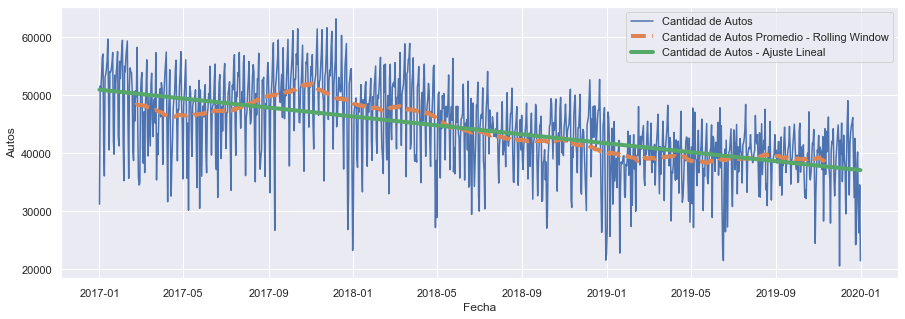

In [31]:
plt.figure(figsize = (15,5))
plt.plot(filter_diario.index, filter_diario.cantidad_pasos, label = 'Cantidad de Autos')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de Autos Promedio - Rolling Window')
plt.plot(filter_diario.index, lr.predict(filter_diario.fecha.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de Autos - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Autos')
plt.legend()
plt.show()

### Tendencia lineal:

    * La tendencia lineal nos indica un descenso de 5 mil autos por año.
    

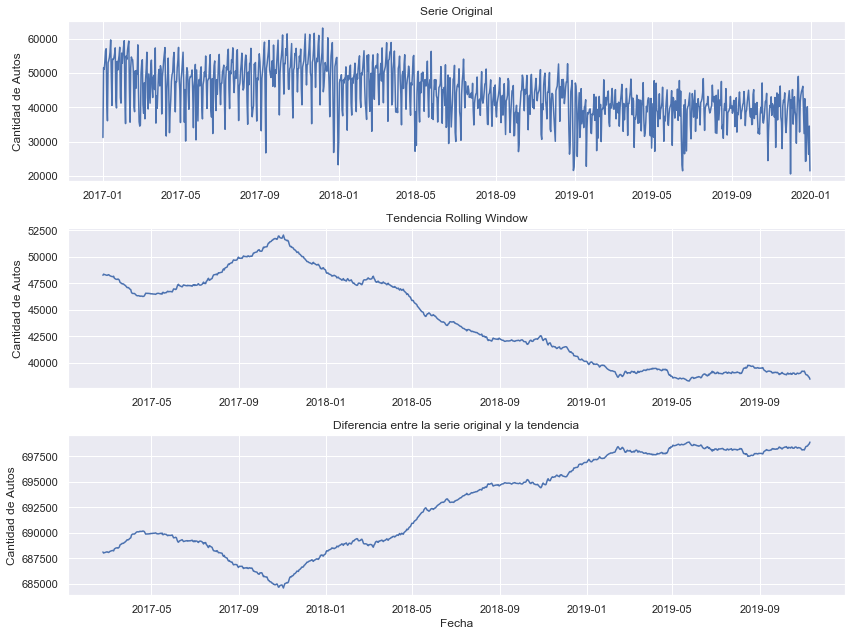

In [32]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(filter_diario.index, filter_diario.cantidad_pasos)
plt.ylabel('Cantidad de Autos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(semanal_promedio_tendencia)
plt.ylabel('Cantidad de Autos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(filter_diario.index, filter_diario.fecha - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Autos')

plt.tight_layout()
plt.show()


### Datos obtenidos de los gráficos:

    * La serie original va en descenso
    * La tendencia indica que bajaran 10250 los pasos
    * La componente de estacionalidad varia entre 30 mil y 50 mil pasos




In [33]:
nlags =  365*3
autocorr = acf(filter_diario.fecha, nlags = nlags)

In [34]:
autocorr.shape

(1087,)

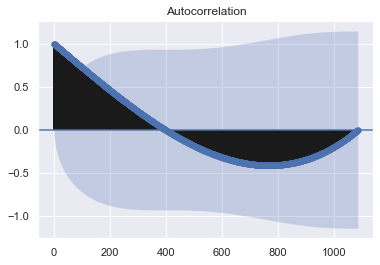

In [35]:
plot_acf(filter_diario.fecha, lags = 362*3)
plt.show()

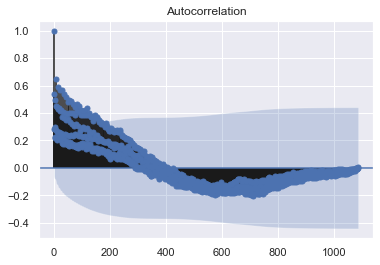

In [36]:
plot_acf(filter_diario.cantidad_pasos, lags = 362*3)
plt.show()

In [37]:
filter_diario.head()

cantidad_pasos   fecha
fecha                             
2017-01-01           31183  736330
2017-01-02           51568  736331
2017-01-03           51093  736332
2017-01-04           53332  736333
2017-01-05           56486  736334

In [38]:
senial = filter_diario.cantidad_pasos
senial.head()

fecha
2017-01-01    31183
2017-01-02    51568
2017-01-03    51093
2017-01-04    53332
2017-01-05    56486
Name: cantidad_pasos, dtype: int64

### Creamos un lookback para poder predecir el siguiente valor

In [39]:
look_back = 360*3 # usamos dos anios de datos para predecir el valor siguiente

In [40]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(6, 1080) (6,)


In [41]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [42]:
print(X)

[[31183. 51568. 51093. ... 32337. 42531. 24220.]
 [51568. 51093. 53332. ... 42531. 24220. 24349.]
 [51093. 53332. 56486. ... 24220. 24349. 38168.]
 [53332. 56486. 57081. ... 24349. 38168. 40182.]
 [56486. 57081. 41587. ... 38168. 40182. 30681.]
 [57081. 41587. 36065. ... 40182. 30681. 26259.]]


In [43]:
N_train = 361*3 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 4*3 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)


X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(3, 1080) (3,)
(3, 1080) (3,)


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

### Graficamos la importancia de cada feature

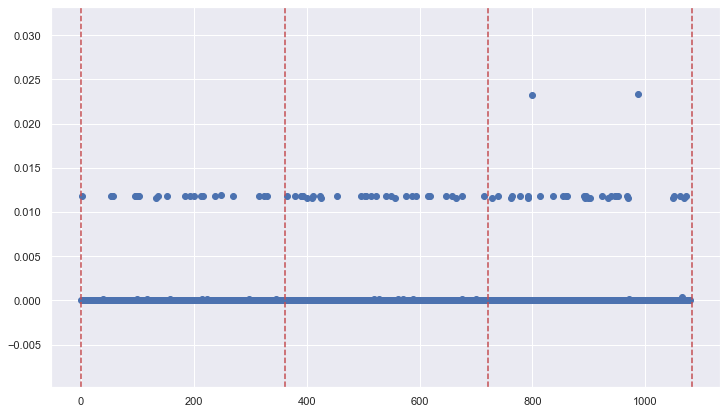

In [45]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(4)*361:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [46]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [47]:
X_test.shape

(3, 1080)

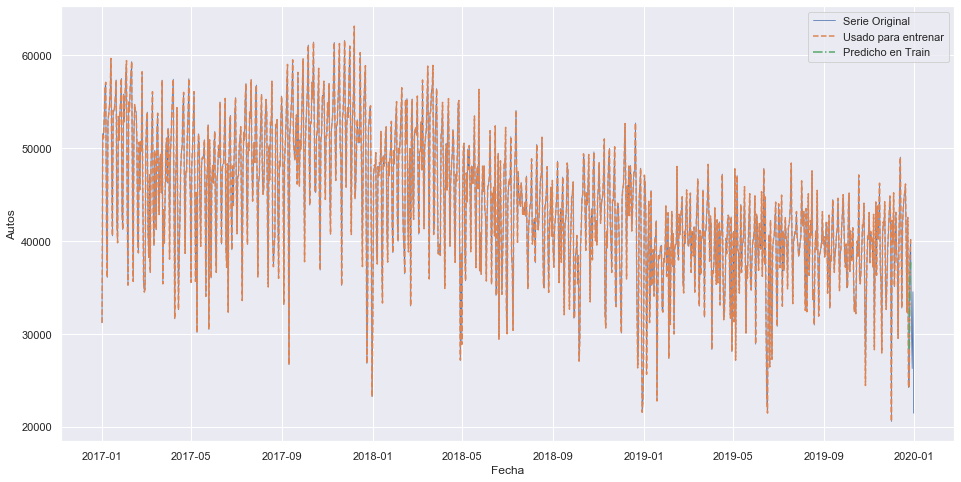

In [48]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Autos')
plt.show()

In [49]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2972.6328042438518
Error en Test: 5207.758040727953


### Obtenemos un error de:

• Test: 5207 autos
• Train: 2972 autos

Al ser amplia la toma de tiempo de 3 años podemos decir que el error esta basante acertado y que en cantidad de autos diarios que ronda los 50000 es de 2900 y 5200 estamos entrenando muy bien nuestro benchamark.

In [50]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

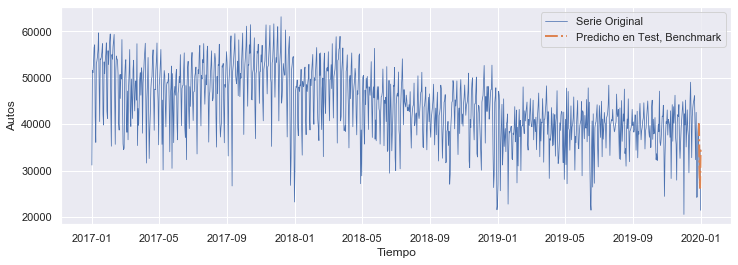

In [51]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')

plt.xlabel('Tiempo')
plt.ylabel('Autos')
plt.legend()
plt.show()

### Como vemos en el grafico anterior el resultado predicho por el test, muestra una tendencia a la baja para el siguiente dia.

---

## Multi-Step Prediction

In [52]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

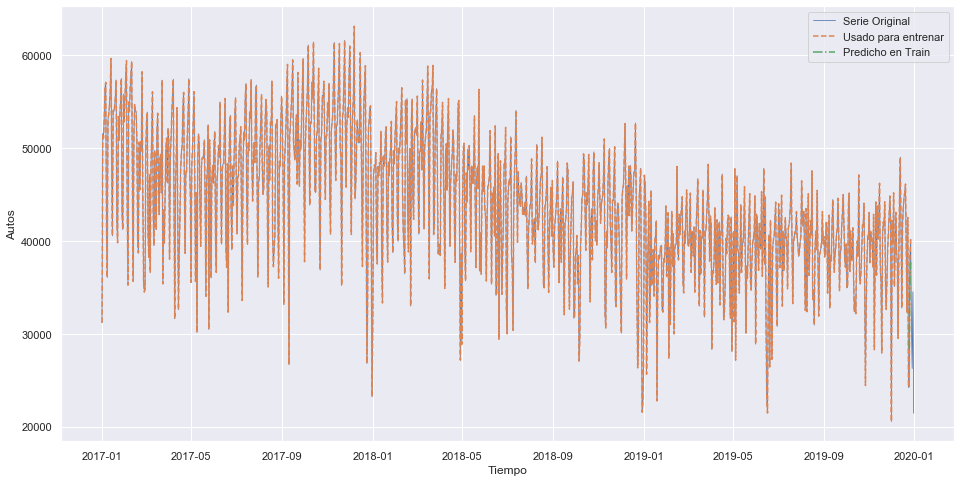

In [53]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')

plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Autos')
plt.show()

In [54]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 5207.758040727953


---

### Libreria Prophet

### Para obtener un mejor analisis y poner en practica la libreria Prophet para hacer unu forecasting mas completo que el de nuestro benchmark

In [55]:
filter_diario.head()

cantidad_pasos   fecha
fecha                             
2017-01-01           31183  736330
2017-01-02           51568  736331
2017-01-03           51093  736332
2017-01-04           53332  736333
2017-01-05           56486  736334

In [56]:
data = filter_diario.rename(columns={"cantidad_pasos": "ds", "fecha": "y"})

In [57]:
filter_diario = filter_diario.rename(columns={"cantidad_pasos": "ds", "fecha": "y"})

In [58]:
data = filter_diario.reset_index()

In [59]:
data.head()

fecha     ds       y
0 2017-01-01  31183  736330
1 2017-01-02  51568  736331
2 2017-01-03  51093  736332
3 2017-01-04  53332  736333
4 2017-01-05  56486  736334

In [60]:
data = data[['fecha', 'ds']]

In [61]:
data.head()

fecha     ds
0 2017-01-01  31183
1 2017-01-02  51568
2 2017-01-03  51093
3 2017-01-04  53332
4 2017-01-05  56486

In [62]:
data = data.rename(columns={"fecha": "ds", "ds": "y"})

In [63]:
data.head()

ds      y
0 2017-01-01  31183
1 2017-01-02  51568
2 2017-01-03  51093
3 2017-01-04  53332
4 2017-01-05  56486

In [64]:
data.drop(data.index[0])

ds      y
1    2017-01-02  51568
2    2017-01-03  51093
3    2017-01-04  53332
4    2017-01-05  56486
5    2017-01-06  57081
...         ...    ...
1082 2019-12-27  40182
1083 2019-12-28  30681
1084 2019-12-29  26259
1085 2019-12-30  34523
1086 2019-12-31  21447

[1086 rows x 2 columns]

### Entrenamos el modelo de Prophet

In [70]:
m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
senial.head()

fecha
2017-01-01    31183
2017-01-02    51568
2017-01-03    51093
2017-01-04    53332
2017-01-05    56486
Name: cantidad_pasos, dtype: int64

In [72]:
senial.dtypes

dtype('int64')

### Tomamos un año de periodo

In [73]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1447 2020-12-26
1448 2020-12-27
1449 2020-12-28
1450 2020-12-29
1451 2020-12-30

In [74]:
forecast = m.predict(future)

In [75]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1447 2020-12-26  28849.885313  22223.177509  35574.580042
1448 2020-12-27  23945.912807  17467.402387  30049.258893
1449 2020-12-28  29581.663950  23513.501877  35716.085231
1450 2020-12-29  30473.672972  23831.135881  36415.655984
1451 2020-12-30  32138.367579  25509.033011  38240.903937

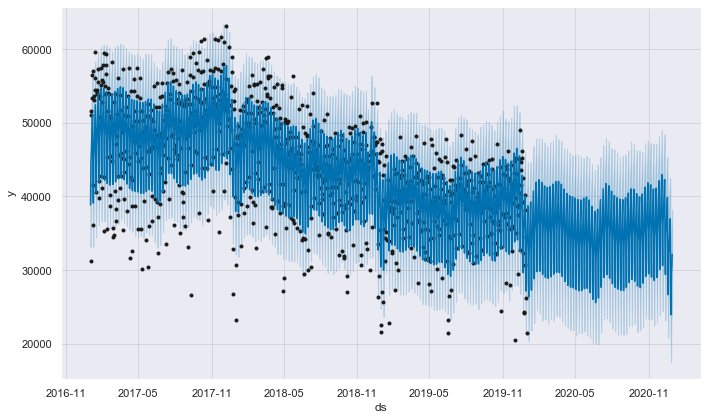

In [76]:
fig1 = m.plot(forecast)

### Forecast:

    * Nos muestra una tendencia a la baja al igual que lo analizado en el rolling window.
    * Podemos observar que la tendencia a la baja se repite
    en series similares de 2017-11 hasta 2018-11 y vuelven a replicarse hacia la baja tres veces consecutivas

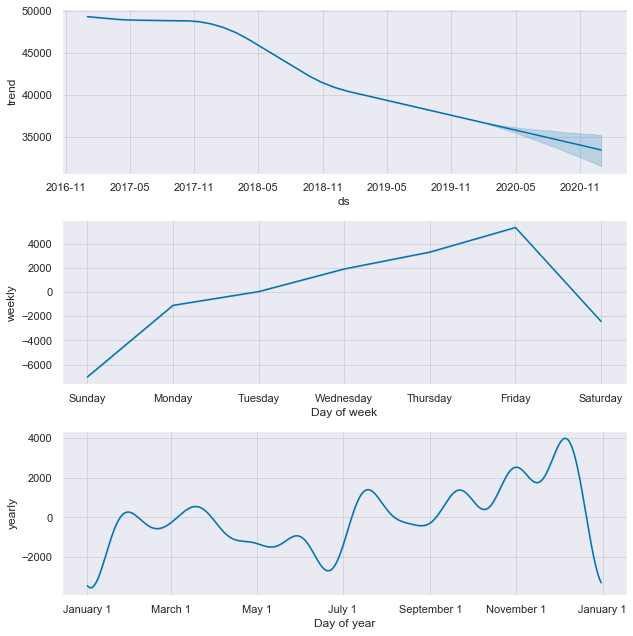

In [77]:
fig2 = m.plot_components(forecast)

### Análisis de Componentes 

    1 Observamos que a medida que va finalizando la semana la gente se vuelca a utilizar mas el auto debido al desgaste diario del uso 
    del transporte público.
    
    2 Anualmente desciende en la epoca de enero y julio donde son los periodos de vacaciones, tanto familiares como escolares en julio.
    
    3 Vemos un incremento del uso del automóvil hacia finales de año, lo cual nos indica un desgaste fisico del transeunte al utilizar 
    medios de transporte públicos

In [78]:
py.init_notebook_mode()
fig = plot_plotly(m, forecast) # This returns a plotly Figure
py.iplot(fig)

### Repetición

    1 Aqui dejamos el grafico zoomeado para mostrar como el forecast de prophet muestra una serie practicamente identica
      a los dos años anteriores, 2018 y 2019.
    
    2 Obtenemos un descenso de 5000 autos por año aproximadamente.
    
    3 Podemos injerir que la gente se inclina por el transporte publico debido al alza del precio del combustible y/o peaje o bien
     podemos injerir que el paso esta transformandose de efectivo a telepase ya que rige una nueva legislación
     del gob bsas para que todos los vehiculos abonen con tarjeta de credito mediante el telepase.

---